# Importing Librabries

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd

#Importing Visualization library
from matplotlib import pyplot as plt
import seaborn as sns
#Importing Plotly for interactive graphs
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
#For using Plotly in offline mode
from plotly.offline import init_notebook_mode, iplot
from sklearn import preprocessing

# Reading the dataset

In [ ]:
#Importing data set from github URL 
url="https://raw.githubusercontent.com/yashjj07/BlackFridaySales-PurchasePrediction/main/BlackFridaySales_Data.csv"
df = pd.read_csv(url)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data description

In [ ]:
#To check the total number of rows and features
df.shape

(550068, 12)

In [ ]:
#Checking descriptive statistics
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


# Insights from above table
Product P00265242 is the most popular product.
Most of the transactions were made by men.
Age group with most transactions was 26-35.
City Category with most transactions was B.
Stay in current city with most transactions was 1 year.

In [ ]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Exploring Dataset

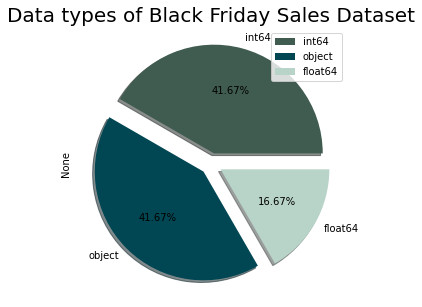

In [ ]:
#Plotting the data types 

df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True,colors = ['#405c50','#004753','#b8d4c8'])
plt.rcParams["figure.figsize"] = (6,6) 
plt.title('Data types of Black Friday Sales Dataset',fontsize = 20);
plt.legend()
plt.show()

# Pre - Processing of the Data
Removing null values, processing outliers and filling missing values if any.

In [ ]:
#Finding missing values
missing_values=df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'Missing_Values':missing_values,
    'Percentange_of_missing_values':percent_missing
}
frame=pd.DataFrame(value)
frame

,Missing_Values,Percentange_of_missing_values
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


## Inference from the above table.
We have null values in only Product_Category_2 and Product_Category_3. However Product_Category_3 has null values for nearly 70% of transactions so it can't give us much information, so we will drop Product_Category_3. And replace the missing values in Product_Category_2 with the median value.

#Finding Missing Values

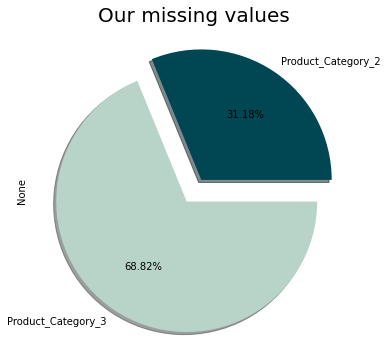

In [ ]:
#Plotting missing values in pie chart

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True,colors = ['#004753','#b8d4c8'])

plt.title('Our missing values',fontsize = 20);

# Filling missing values
 With median of that column.


In [ ]:
# Filling Product_Category_2 using median 
median = df['Product_Category_2'].median()
df['Product_Category_2'].fillna(median, inplace=True)

#Dropping Irrelevent Columns

In [ ]:
# Dropping Product_Category_3 
new_df=df.drop('Product_Category_3',axis=1)
new_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,7969


#Cross Chechking
If there are any other null values left.

In [ ]:
#Rechecking for missing values
missing_values=new_df.isnull().sum()
percent_missing = new_df.isnull().sum()/new_df.shape[0]*100

value = {
    'Missing_Values':missing_values,
    'Percentange_of_missing_values':percent_missing
}
frame=pd.DataFrame(value)
frame

,Missing_Values,Percentange_of_missing_values
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


#Exploratory Data Analysis
Data Visualisation

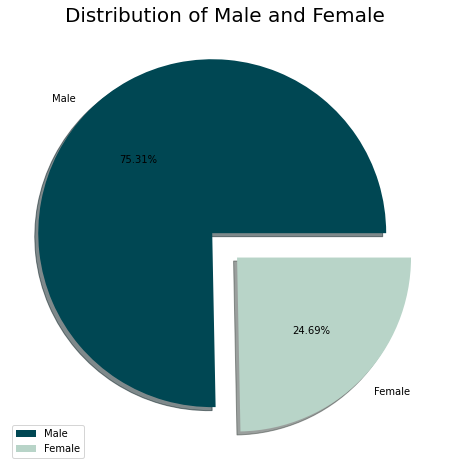

In [ ]:
#Distribution of Male and Female pie chart 

size = df['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#004753','#b8d4c8']
explode = [0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Male and Female', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

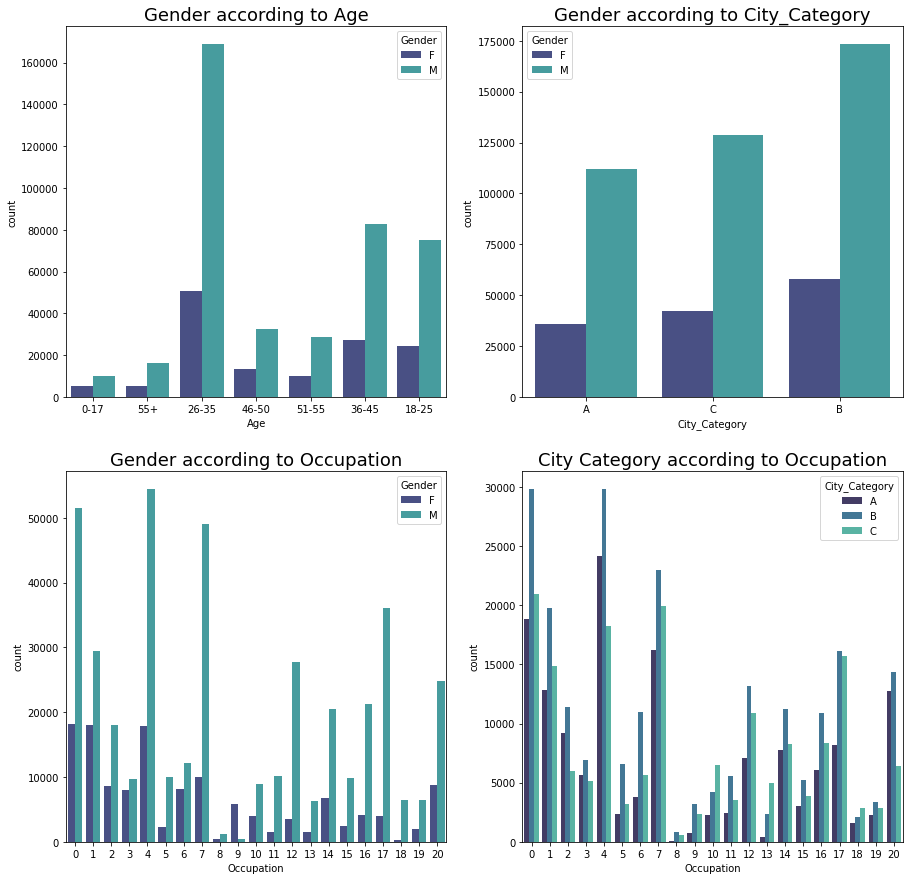

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

In [ ]:
#Distribution of customers across different age groups, City_Categories, Occupation w.r.t gender.


#Declaring function to avoid code repetition.
def Countplot_with_hue(df , x , y ,hue ,ax ,title):
    plt.figure(figsize=(15, 7))
    sns.countplot(x=x, y=y , hue=hue, data=df, ax=ax, palette='mako').set_title(title, fontsize=18)


sorted_data = df.sort_values(by=['City_Category', 'Age',"Stay_In_Current_City_Years"] , ascending=True)

#Calling Function and calling figure object.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[15, 15])
Countplot_with_hue(df , "Age" , None ,"Gender",axes[0,0],"Gender according to Age")
Countplot_with_hue(df , "City_Category" , None ,"Gender",axes[0,1],"Gender according to City_Category")
Countplot_with_hue(sorted_data , "Occupation" , None ,"Gender",axes[1,0],"Gender according to Occupation")
Countplot_with_hue(sorted_data , "Occupation" , None ,"City_Category",axes[1,1],"City Category according to Occupation")


#Outliers
For purchase column across 

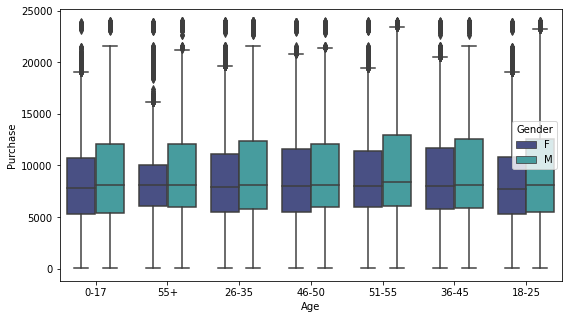

In [ ]:
#Depicts the Purchase **Boxplot** across all age groups different age groups & gender.
plt.rcParams['figure.figsize'] = (9,5)
sns.boxplot(x='Age',y='Purchase',data=df,hue='Gender',palette='mako')

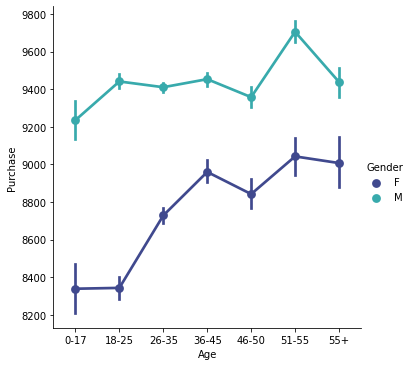

In [ ]:
#Average Purchase - different age groups & gender
#Using Seaborn
#Catplot Age+Purchase
sns.catplot(x='Age',y='Purchase',kind='point',data=df, order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],hue='Gender',palette='mako')

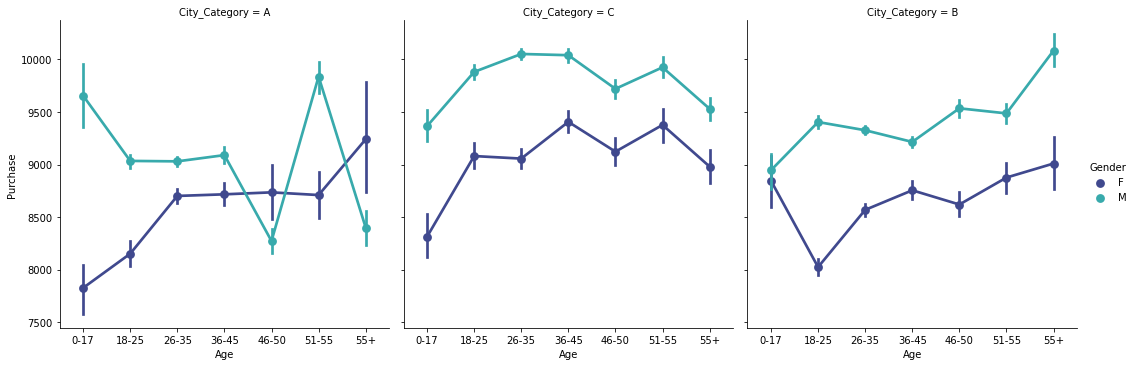

In [ ]:
#Average Purchase - different age groups, City_Category & Gender
#Using Seaborn library

sns.catplot(x='Age',y='Purchase',kind='point',data=df,col='City_Category',hue='Gender', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],palette='mako')

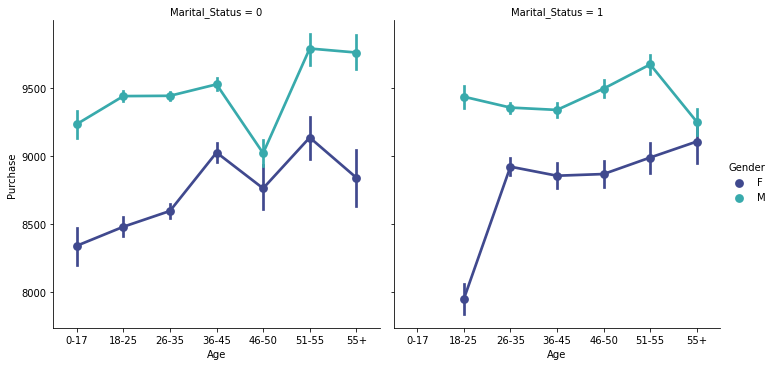

In [ ]:
#Average Purchase - different age groups,Marital_Status  & Gender
#Using Seaborn library

sns.catplot(x='Age',y='Purchase',kind='point',data=df,col='Marital_Status',hue='Gender', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],palette='mako')

#Creating new DF
for doing further EDA

In [ ]:
df1 = df.groupby('User_ID').first()
df1 = df1.loc[:, ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']]
df1['Purchase'] = df.groupby('User_ID').sum()['Purchase']
df1['Products_Purchased'] = df.groupby('User_ID').count()['Purchase']

df1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Products_Purchased
User_ID,,,,,,,,
1000001,F,0-17,10,A,2,0,334093,35
1000002,M,55+,16,C,4+,0,810472,77
1000003,M,26-35,15,A,3,0,341635,29
1000004,M,46-50,7,B,2,1,206468,14
1000005,M,26-35,20,A,1,1,821001,106


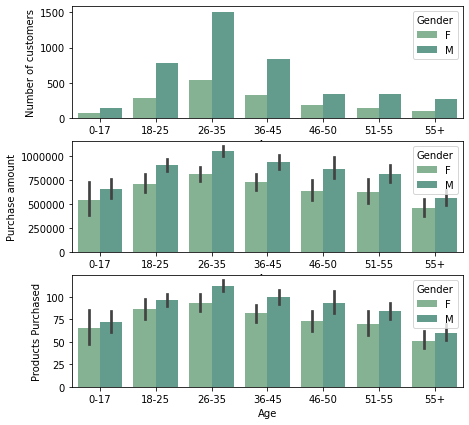

In [ ]:
#Customer distribution according to age and gender wrt products purchased and amount spent

fig, axes = plt.subplots(3, 1, figsize=(7, 7))
sns.set_palette(sns.color_palette("crest"))

sns.countplot(ax=axes[0], x='Age', hue='Gender', data=df1.sort_values('Age'))
axes[0].set_ylabel('Number of customers')
sns.barplot(ax=axes[1], x='Age', y='Purchase', hue='Gender', data=df1.sort_values('Age'))
axes[1].ticklabel_format(useOffset=False, style='plain', axis='y')
axes[1].set_ylabel('Purchase amount')
sns.barplot(ax=axes[2], x='Age', y='Products_Purchased', hue='Gender', data=df1.sort_values('Age'))
axes[2].set_ylabel('Products Purchased')
plt.show()

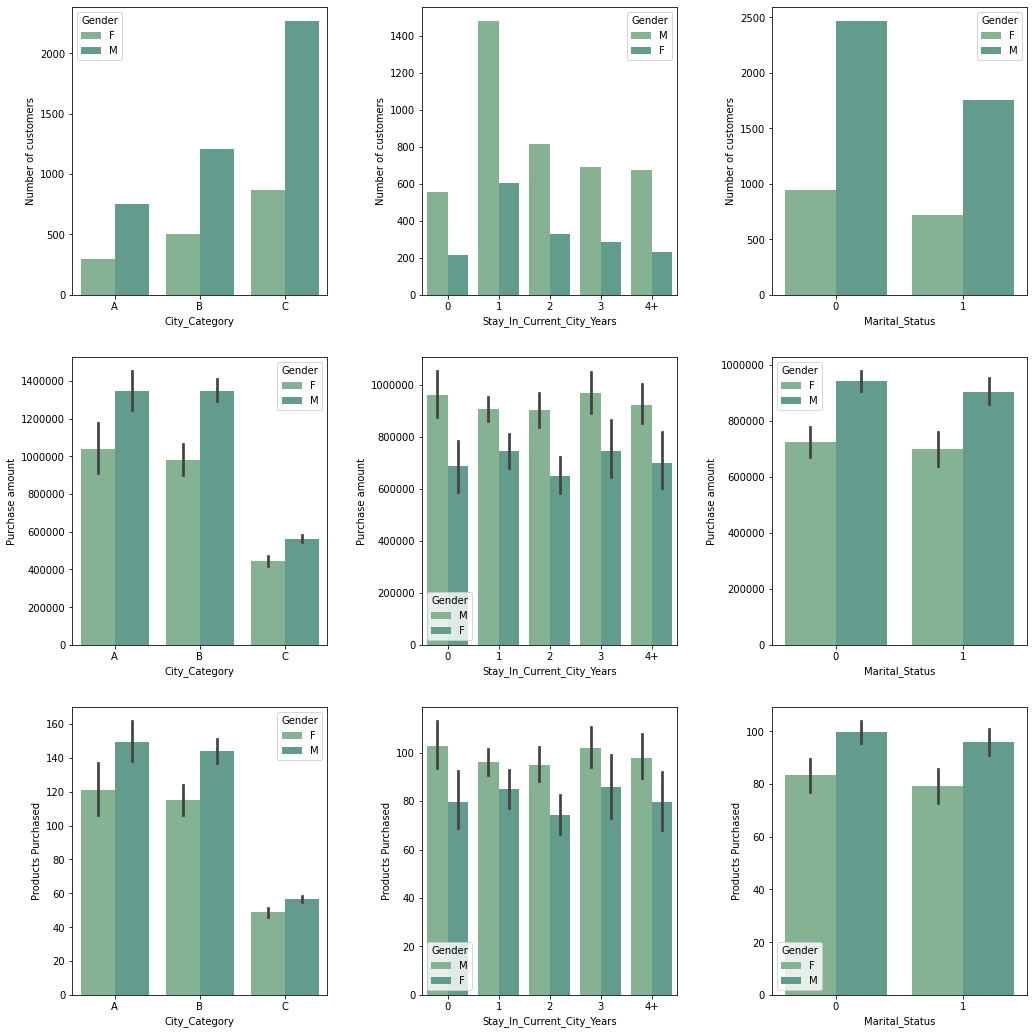

In [ ]:
#Customer distribution according to City, Stay in current city and Marital status

fig, axes = plt.subplots(3, 3, figsize=(15,15))
for i, feat in enumerate(('City_Category', 'Stay_In_Current_City_Years', 'Marital_Status')):
    sns.countplot(ax=axes[0, i], x=feat,hue='Gender', data=df1.sort_values(feat))
    axes[0, i].set_ylabel('Number of customers')
    sns.barplot(ax=axes[1, i], x=feat, y='Purchase',hue='Gender', data=df1.sort_values(feat))
    axes[1, i].ticklabel_format(useOffset=False, style='plain', axis='y')
    axes[1, i].set_ylabel('Purchase amount')
    sns.barplot(ax=axes[2, i], x=feat, y='Products_Purchased',hue='Gender', data=df1.sort_values(feat))
    axes[2, i].set_ylabel('Products Purchased')
    
fig.tight_layout(pad=3.0)

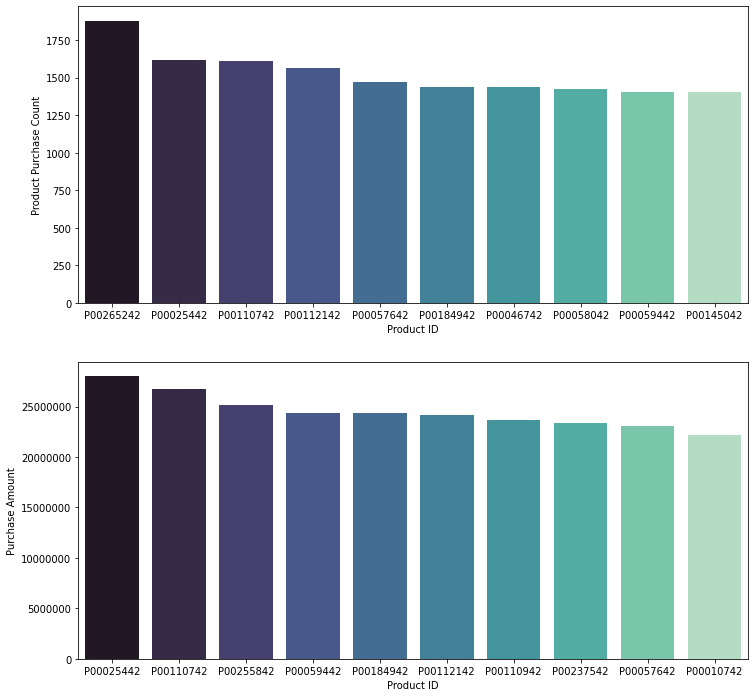

In [ ]:
#Best-selling products



fig, axes = plt.subplots(2, 1, figsize=(12, 12))

top_products_count = pd.DataFrame(df['Product_ID'].value_counts()).head(10)
sns.barplot(ax=axes[0], x=top_products_count.index, y=top_products_count.values.reshape(-1),palette='mako')
axes[0].set_xlabel('Product ID')
axes[0].set_ylabel('Product Purchase Count')

top_products_sum = df.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head(10)
sns.barplot(ax=axes[1], x=top_products_sum.index, y=top_products_sum.values.reshape(-1),palette='mako')
axes[1].ticklabel_format(useOffset=False, style='plain', axis='y')
axes[1].set_xlabel('Product ID')
axes[1].set_ylabel('Purchase Amount')
plt.show()

#Model Building

Creating data frame backup. 

In [ ]:
#Creating data backup
df2 = new_df.copy()
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,7969


# Dropping the features that are not significant

In [ ]:
# Dropping User_ID & Product_ID 
df2=df2.drop(['User_ID','Product_ID'],axis=1)
df2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969


#Label Encoding

In [ ]:
#Encoding all categorical variables.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Age'] = le.fit_transform(df2['Age'])
df2['Gender'] = le.fit_transform(df2['Gender'])
df2['City_Category'] = le.fit_transform(df2['City_Category'])
df2['Stay_In_Current_City_Years'] = le.fit_transform(df2['Stay_In_Current_City_Years'])
df2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,9.0,8370
1,0,0,10,0,2,0,1,6.0,15200
2,0,0,10,0,2,0,12,9.0,1422
3,0,0,10,0,2,0,12,14.0,1057
4,1,6,16,2,4,0,8,9.0,7969


In [ ]:
#Chechking datatype of all the features before feeding them in to the model.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 37.8 MB


#Correlation Matrix
Using Seaborn to plot Heatmap.

In [ ]:
df2.corr()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Gender,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.014051,0.060346
Age,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.043503,0.015839
Occupation,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.000557,0.020833
City_Category,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.006888,0.061914
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.001087,0.005422
Marital_Status,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.011526,-0.000463
Product_Category_1,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.331691,-0.343703
Product_Category_2,-0.014051,0.043503,0.000557,-0.006888,-0.001087,0.011526,0.331691,1.000000,-0.156676
Purchase,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,-0.156676,1.000000


#Heatmap using Seaborn

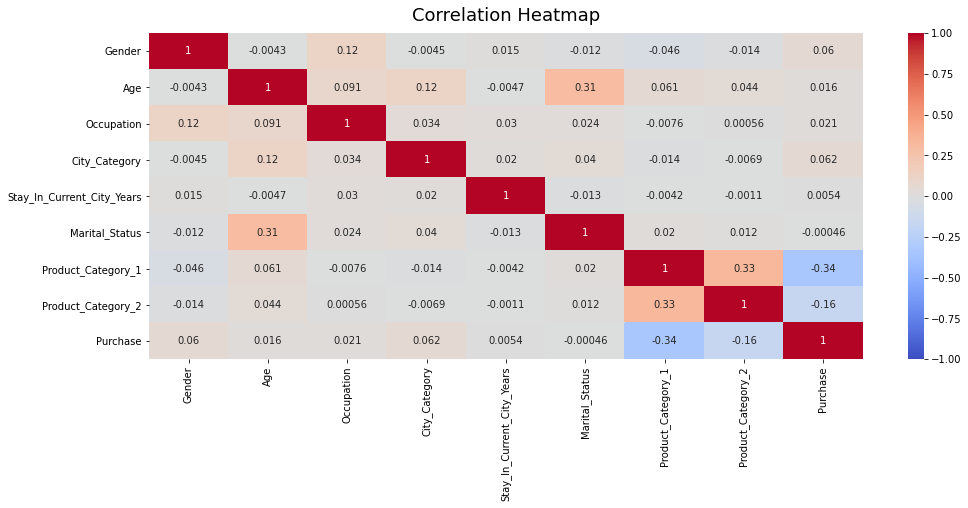

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

#Splitting the data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
#Segregrating dependent and independent variables
X=df2.drop('Purchase',axis=1)
Y=df2.Purchase

In [ ]:
#Splitting in the ratio of 75:25
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (412551, 8) (412551,)
Test set: (137517, 8) (137517,)


# Feature Scaling/Normalization

In [ ]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

# Model Building - Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
#creating an object of linear regression
lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


# Calculating Score

In [ ]:
lm.score(x_train,y_train)*100

18.29399221126392

In [ ]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 19729.552968112344
                             Coefficient
Gender                       4600.317837
Age                          -707.126457
Occupation                  -5278.709296
City_Category                3290.031966
Stay_In_Current_City_Years  -1168.813660
Marital_Status               -961.702655
Product_Category_1         -11935.629403
Product_Category_2          -6647.949977


# Doing Prediction

In [ ]:
predictions = lm.predict(x_test)
print("Predicted purchases:", predictions)

Predicted purchases: [11482.15603653  6206.36422498 12059.80605604 ...  7856.96568764
  8633.24056875  8433.34239008]


#Checking Accuracy of model

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score:", r2_score(y_test, predictions)*100,"%")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R2 Score: 18.028476092029322 %
MAE: 3436.8451798759
MSE: 20501057.786836237
RMSE: 4527.809380576466


#Analyzing Model - Scatter Plot & Normal Distribution

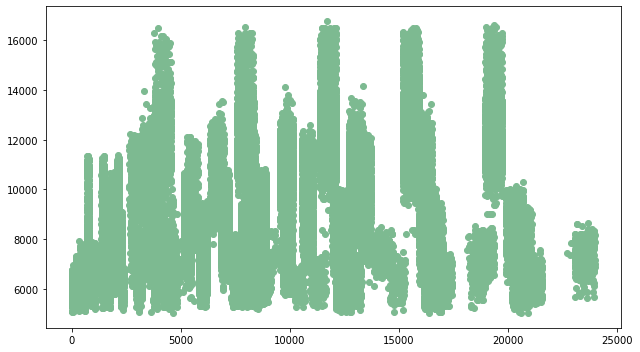

In [ ]:
#Comparing y_test which is correct proces with predicted prices which we got above

#USing Scatter plot for comapring

plt.scatter(y_test,predictions,cmap='coolwarm')
plt.tight_layout()
#Linear relationship shows our model have predicted right values

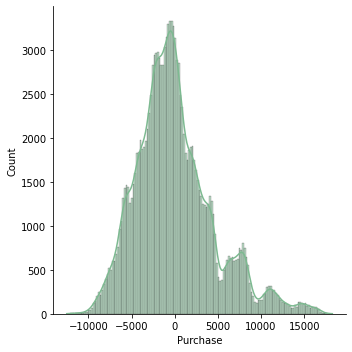

In [ ]:
#Distrubution of our residuals
sns.displot((y_test-predictions),kde=True)
#If wer have normally distributed residuals it means mopdel was correct choice for data

#Final Verdict


1.   R2 Score: 18.028 %
2.   MAE: 3436.84
3.   MSE: 20501057.78
4.   RMSE: 4527.80



*   Model will just 18.028% predictions
*   Different ML models can be explored for higher accuracy. 




